# A function to solve a linear programming problem using OR-Tools library.

Input: 
- solver: A solver object created using pywraplp module of OR-Tools library.
- variable_list: A list of variables used in the problem, created using the NumVar method of the solver object.
- constraint_list: A list of constraints added to the problem, created using the Add method of the solver object.

Output:
- Prints the number of variables and constraints in the problem.
- Solves the problem and prints the optimal solution, time taken, and reduced cost of each variable.
- Prints the dual value and activity level of each constraint.




In [32]:

from ortools.linear_solver import pywraplp

def ShowResults(solver, variable_list, constraint_list):
    """Solve the problem and print the solution."""
    print('# of variables = %d' % solver.NumVariables())
    print('# of constraints = %d' % solver.NumConstraints())

    result_status = solver.Solve()

    # check results are ok
    assert result_status == pywraplp.Solver.OPTIMAL
    assert solver.VerifySolution(1e-7, True)

    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Optimal objective value = %f' % solver.Objective().Value())
    for variable in variable_list:
        print('%s = %f' % (variable.name(), variable.solution_value()))
    print('Problem solved in %d iterations' % solver.iterations())
    for variable in variable_list:
        print('%s: reduced cost = %f' %
              (variable.name(), variable.reduced_cost()))
    activities = solver.ComputeConstraintActivities()
    for i, constraint in enumerate(constraint_list):
        print(('constraint %d: dual value (shadow price) = %f\n'
               '              final value (activity) = %f\n'
               '              slack  = %f' %
               (i, constraint.dual_value(), activities[constraint.index()],constraint.ub()-activities[constraint.index()])))


In [33]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_solution(variable_list, constraint_list):
    num_vars = len(variable_list)
    
    if num_vars == 2:
        x_vals = np.linspace(0, 100, 400)
        
        plt.figure(figsize=(10, 6))
        
        for constraint in constraint_list:
            coeffs = constraint.coefficients()
            intercept = constraint.ub()
            slope = -coeffs[0] / coeffs[1] if coeffs[1] != 0 else float('inf')
            if slope != float('inf'):
                intercept /= coeffs[1]
                y_vals = (intercept - coeffs[0] * x_vals / coeffs[1])
                plt.plot(x_vals, y_vals, label=constraint.name())
        
        plt.xlim(0, 50)
        plt.ylim(0, 50)
        
        optimal_x1 = variable_list[0].solution_value()
        optimal_x2 = variable_list[1].solution_value()
        
        plt.plot(optimal_x1, optimal_x2, 'ro', label='Optimal solution')
        
        plt.xlabel(variable_list[0].name())
        plt.ylabel(variable_list[1].name())
        plt.legend()
        plt.title('Feasible Region and Optimal Solution')
        plt.show()
    
    elif num_vars == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        x1_vals = np.linspace(0, 50, 50)
        x2_vals = np.linspace(0, 50, 50)
        x1_vals, x2_vals = np.meshgrid(x1_vals, x2_vals)
        
        for constraint in constraint_list:
            coeffs = constraint.coefficients()
            intercept = constraint.ub()
            if coeffs[2] != 0:
                z_vals = (intercept - coeffs[0] * x1_vals - coeffs[1] * x2_vals) / coeffs[2]
                ax.plot_surface(x1_vals, x2_vals, z_vals, alpha=0.5, label=constraint.name())
        
        optimal_x1 = variable_list[0].solution_value()
        optimal_x2 = variable_list[1].solution_value()
        optimal_x3 = variable_list[2].solution_value()
        
        ax.scatter(optimal_x1, optimal_x2, optimal_x3, color='red', s=100)
        
        ax.set_xlabel(variable_list[0].name())
        ax.set_ylabel(variable_list[1].name())
        ax.set_zlabel(variable_list[2].name())
        plt.title('Feasible Region and Optimal Solution')
        plt.show()


run code

In [34]:

# Define the solver to use
solver = pywraplp.Solver.CreateSolver('GLOP')

# Define the problem
infinity = solver.infinity()
x1 = solver.NumVar(0.0, infinity, 'XA')
x2 = solver.NumVar(0.0, infinity, 'XB')

solver.Maximize(50 * x1 + 60 * x2)
c0 = solver.Add(50 * x1 + 30 * x2  <= 2000, 'Material')
c1 = solver.Add(6 * x1 + 5 * x2  <= 300, 'MachineTime')
c2 = solver.Add(3 * x1 + 5 * x2  <= 200, 'Labor')

ShowResults(solver, [x1, x2], [c0, c1, c2])

plot_solution([x1, x2], [c0, c1, c2])


# of variables = 2
# of constraints = 3
Problem solved in 5.000000 milliseconds
Optimal objective value = 2750.000000
XA = 25.000000
XB = 25.000000
Problem solved in 4 iterations
XA: reduced cost = 0.000000
XB: reduced cost = 0.000000
constraint 0: dual value (shadow price) = 0.437500
              final value (activity) = 2000.000000
              slack  = 0.000000
constraint 1: dual value (shadow price) = -0.000000
              final value (activity) = 275.000000
              slack  = 25.000000
constraint 2: dual value (shadow price) = 9.375000
              final value (activity) = 200.000000
              slack  = 0.000000


AttributeError: 'Constraint' object has no attribute 'coefficients'

<Figure size 1000x600 with 0 Axes>

# of variables = 2
# of constraints = 2
Problem solved in 13.000000 milliseconds
Optimal objective value = 400.000000
XA = 4.000000
XB = 8.000000
Problem solved in 2 iterations
XA: reduced cost = -0.000000
XB: reduced cost = -0.000000
constraint 0: dual value (shadow price) = 20.000000
              final value (activity) = 12.000000
              slack  = 0.000000
constraint 1: dual value (shadow price) = 10.000000
              final value (activity) = 16.000000
              slack  = 0.000000


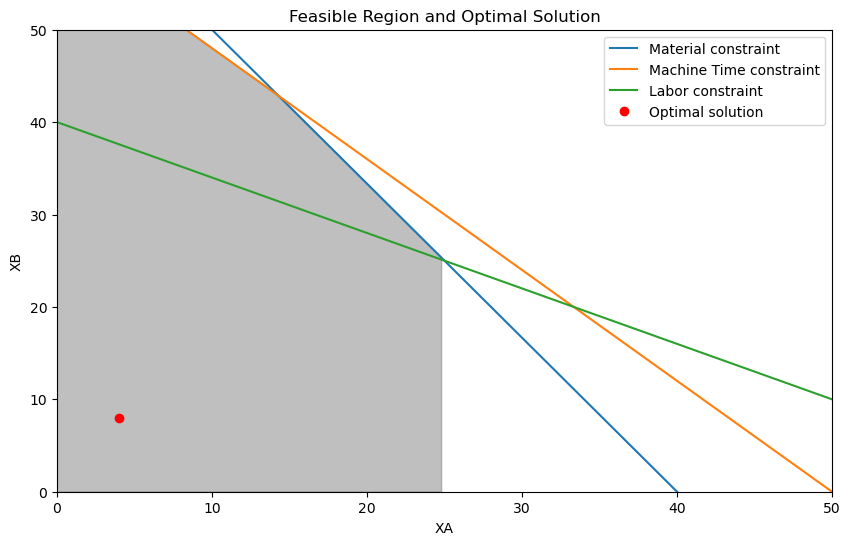

In [ ]:
# Define the solver to use
solver = pywraplp.Solver.CreateSolver('GLOP')

# Define the problem
infinity = solver.infinity()
x1 = solver.NumVar(0.0, infinity, 'XA')
x2 = solver.NumVar(0.0, infinity, 'XB')

solver.Maximize(40 * x1 + 30 * x2)
c0 = solver.Add(x1 + x2 <= 12, 'Constraint 1')
c1 = solver.Add(2 * x1 + x2 <= 16, 'Constraint 2')


ShowResults(solver, [x1, x2], [c0, c1])

plot_solution([x1, x2], [c0, c1])